<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Juypter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Chemical modelling: Calcium equilibrium concentration
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In this notebook, we derive and discuss the
**calcium equilibrium concentration**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import geodyn_chem as chem
#help(chem)
import geodyn_div;geodyn_div.change_fonts()

----
# Calcite dissolution
<table><tr>
<td><img src="images/chemical_reactions_open.jpg" style=width:80mm></td>
<td><img src="images/chemical_reactions_closed.jpg" style=width:80mm></td>
</tr></table>

$$
\begin{array}{rcl}
  {\rm CaCO}_3 + {\rm H}^+             
  & \overset{\kappa_1}{\underset{\kappa'_4}{\leftrightarrow}} & {\rm Ca}^{2+} + {\rm HCO}_3^- \\
  {\rm CaCO}_3 + {\rm H}_2{\rm CO}_3^0 
  & \overset{\kappa_2}{\underset{\kappa''_4}{\leftrightarrow}} & {\rm Ca}^{2+} + 2{\rm HCO}_3^- \\
  {\rm CaCO}_3 + {\rm H}_2{\rm O}      
  & \overset{\kappa_3}{\underset{\kappa'''_4}{\leftrightarrow}} & {\rm Ca}^{2+} + {\rm CO}_3^{2-} 
\end{array}
$$

We summarize, for a moment, these equations to the
**solubility product** $K_C$ [mol$^2$/l$^2$] at equilibrium is given by:
$$
K_C = (\textrm{Ca}^{2+})(\textrm{CO}_3)
$$
with the activities given in round brackets.

In [2]:
def KC(TC,S=0.):
    """
    -----------------------------------------------------------------------
    calcite solubility
    from:
    Mucci, Alphonso, Amer. J. of Science 283:781-799, 1983.
      sd fit = .01 (for Sal part, not part independent of Sal)
      this is in (mol/kg-SW)^2
    -----------------------------------------------------------------------
    """
    TK  = 273.16 + TC
    KC = -171.9065 - 0.077993*TK + 2839.319/TK
    KC = KC + 71.595*np.log(TK)/np.log(10.0)
    KC = 10.0**KC
    return KC

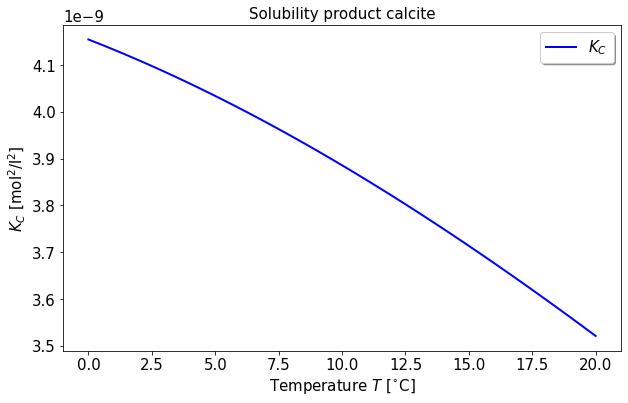

In [15]:
TC = np.linspace(0,20,101)

plt.figure(figsize=(10.0, 6.0))
plt.title('Solubility product calcite')
plt.xlabel('Temperature $T$ [$^{\circ}$C]')
plt.ylabel('$K_C$ [mol$^2$/l$^2$]')
plt.plot(TC,KC(TC),color='blue',linestyle='solid',linewidth=2,label='$K_C$')
plt.legend(loc='upper right',shadow=True)
plt.savefig('figures/CHEM_KC.png')

----
## Calcium equilibrium concentration
We recall the definition of the **ionic strength**. The ionic strength of a solution is defined as
$$
  I = \frac{1}{2} \sum\limits_i z_i^2 [X_i]
$$
Here, $z_i$ is the ionic charge, and~$[X_i]$ (in mol~l$^{-1}$) the concentration of species~$X_i$.

Using the dissolved species Ca$^{2+}$, H$^+$, OH$^-$, HCO$_3^-$, CO$_3^{2-}$, find:
$$
I = \frac{1}{2} 
\left( 4 [{\rm Ca}^{2+}] + [{\rm H}^{+}] + [{\rm OH}^{-}] + 4 [{\rm CO}_3^{2-}] + [{\rm HCO}_3^{-}] \right)
$$

The **equation of electro-neutrality**, when neglecting ion pairs, reads:
$$
2 [{\rm Ca}^{2+}] + [{\rm H}^+] = [{\rm HCO}_3^-] + 2 [{\rm CO}_3^{2-}] + [{\rm OH}^-]
$$

In natural karst water, with $4<pH<8$ and neglecting ion pairs, the concentration of hydrogen,
hydroxyl, and carbonate can be neglected.
Then ionic strength and electro-neutrality relax to 
$$\begin{array}{rcl}
I &\simeq& 3 [{\rm Ca}^{2+}] \\
2 [{\rm Ca}^{2+}] &=& [{\rm HCO}_3^-]
\end{array}$$

For solutions, which are saturated with respect to calcite, a simplified form of the charge balance~(\ref{kin_43})
can be used: $2 [{\rm Ca}^{2+}] = [{\rm HCO}_3^-]$. Using (\ref{kin_5}), (\ref{kin_11}), (\ref{kin_12}),
(\ref{kin_13}), (\ref{kin_15}), and (\ref{kin_19}), and observing the simplified charge balance, after
some algebraic manipulations we obtain an analytical expression for the calcium equilibrium concentration
as a function of carbon-dioxide partial pressure:
$$\fbox{$
 [{\rm Ca}^{2+}]^3_{eq} = \frac{K_1 K_C K_H}{4 K_2 
 \gamma_{{\rm Ca}^{2+}} \gamma^2_{{\rm HCO}_3^{2+}} } p_{CO_2}
$}$$
This relation is valid for the open system.

For the closed system, the carbon dioxide pressure will reduce:
$$
 p_{CO_2} = p_{CO_2}^{initial} - \frac{[{\rm Ca}^{2+}]_{eq}}{K_H (1 + {1 \over {K_0}})}, 
 \quad p_{CO_2}^{initial} > 7 \times 10^{-4} \mbox{atm}
$$

In [4]:
TC = 10
strength = 1e-4

[ion_hp,ion_ca2p,ion_mg2p,ion_ohm,ion_hco3m,ion_co32m,ion_so42m,ion_nap,ion_clm]=chem.ion_debyehueckel(strength,TC)

$$
[\textrm{Ca}^{2+}]^3 =
\frac{K_1 K_C K_H}{4 K_2 \gamma_{Ca^{2+}} \gamma^2_{HCO_3^{-}}} pCO_2
$$

In [5]:
def CEQ_limestone_open (TC,pco2):
    '''
    !-----------------------------------------------------------------------
    !  function calculates calcium equilibrium concentration for limestone
    !  and the open system case
    ! input:
    !  K1                  - mol / l
    !  KC                  - mol^2 / l^2
    !  KH                  - mol / l atm
    !  K2                  - mol / l
    !  TC                  - C
    !  pco2                - atm
    ! output:
    !  chem_ceq_limestone_open - mol / l => mol / m^3
    !  written by Georg Kaufmann 03/01/2008
    !-----------------------------------------------------------------------
    '''
    # check for freezing conditions
    if (TC < 0.):
        sys.exit('chem_ceq_limestone_open: T<0')
    # calculate mass balance coeeficients
    K1 = chem.K1K2(TC)[0]
    K2 = chem.K1K2(TC)[1]
    KH = chem.KH(TC)
    KC = chem.KC(TC)
    # loop over ionis strength
    strength=1.e-4
    for i in range(1,7):
        [ion_hp,ion_ca2p,ion_mg2p,ion_ohm,ion_hco3m,ion_co32m,ion_so42m,ion_nap,ion_clm]=chem.ion_debyehueckel(strength,TC)
        kk = K1*KC*KH / (4.0*K2*ion_ca2p*ion_hco3m**2)
        ceq = (pco2*kk)**(1.0/3.0)
        strength = 3.0*ceq
       #print (k0,k1,k2,k5,kc,ka,kh,kw)
       #print (ion_hp,ion_ca2p,ion_mg2p,ion_ohm,ion_hco3m,ion_co32m,ion_so42m,ion_nap,ion_clm)
    # rescale to mol/m^3
    ceq = 1000.*ceq
    return ceq

In [6]:
pco2 = np.zeros([0,0])
ceq1 = np.zeros([0,0])
ceq2 = np.zeros([0,0])
ceq3 = np.zeros([0,0])
ceq4 = np.zeros([0,0])
for p in np.arange(400,30000,step=10):
    pco2 = np.append(pco2,p)
    temp = 5.
    ceq1 = np.append(ceq1,CEQ_limestone_open(temp,p/1.e6))
    temp = 10.
    ceq2 = np.append(ceq2,CEQ_limestone_open(temp,p/1.e6))
    temp = 15.
    ceq3 = np.append(ceq3,CEQ_limestone_open(temp,p/1.e6))
    temp = 20.
    ceq4 = np.append(ceq4,CEQ_limestone_open(temp,p/1.e6))
   #print(temp,ceq_open)

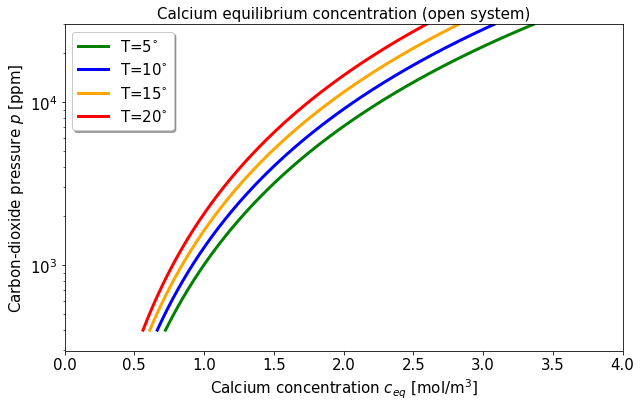

In [16]:
plt.figure(figsize=(10.0, 6.0))
plt.title('Calcium equilibrium concentration (open system)')
plt.xlim([0,4])
plt.ylim([300,30000])
plt.xlabel('Calcium concentration $c_{eq}$ [mol/m$^3$]')
plt.ylabel('Carbon-dioxide pressure $p$ [ppm]')
plt.semilogy(ceq1,pco2,color='green',linestyle='solid',linewidth=3,label='T=5$^{\circ}$')
plt.semilogy(ceq2,pco2,color='blue',linestyle='solid',linewidth=3,label='T=10$^{\circ}$')
plt.semilogy(ceq3,pco2,color='orange',linestyle='solid',linewidth=3,label='T=15$^{\circ}$')
plt.semilogy(ceq4,pco2,color='red',linestyle='solid',linewidth=3,label='T=20$^{\circ}$')
plt.legend(loc='upper left',shadow=True)
plt.savefig('figures/CHEM_CEQ_PCO2.png')

----
## The path of a drop: stalagmites

In [8]:
TC = 10.
Pco2 = 10000.

print ('ceq_open:   ',TC,CEQ_limestone_open(TC,Pco2/1.e6))
print ('ceq_closed: ',TC,chem.CEQ_limestone_closed(TC,Pco2/1.e6))

ceq_open:    10.0 2.0722258209669744
ceq_closed:  10.0 0.5255859719142791


In [27]:
n = np.array([1,2,3,4,5])
c = np.array([0.,0.,2.07,2.07,0.92])
p = np.array([420,15000,10000,1000,1000])

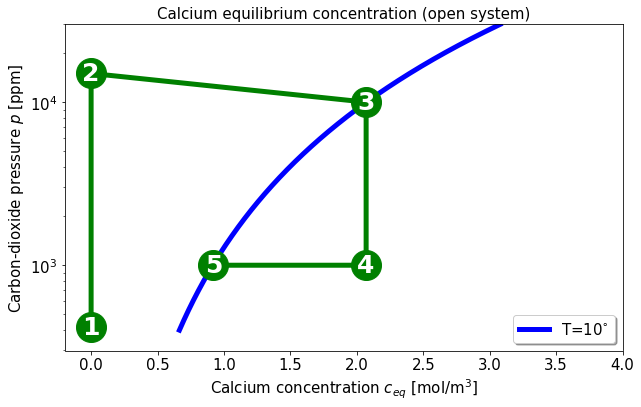

In [28]:
plt.figure(figsize=(10.0, 6.0))
plt.title('Calcium equilibrium concentration (open system)')
plt.xlim([-0.20,4])
plt.ylim([300,30000])
plt.xlabel('Calcium concentration $c_{eq}$ [mol/m$^3$]')
plt.ylabel('Carbon-dioxide pressure $p$ [ppm]')
plt.semilogy(ceq2,pco2,color='blue',linestyle='solid',linewidth=5,label='T=10$^{\circ}$')
plt.plot(c,p,marker='o',markersize=30,linewidth=5,color='green')
for i in range(len(n)):
    plt.text(c[i],p[i],str(n[i]),horizontalalignment='center',verticalalignment='center',
             color='white',weight='bold',fontsize=25)
plt.legend(loc='lower right',shadow=True)
plt.savefig('figures/CHEM_CEQ_PCO2.png')

----
## The path of a drop: solution pockets

In [29]:
n = np.array([1,2,3,4])
c = np.array([0.,0.68,0.68,0.92])
p = np.array([420,420,1000,1000])

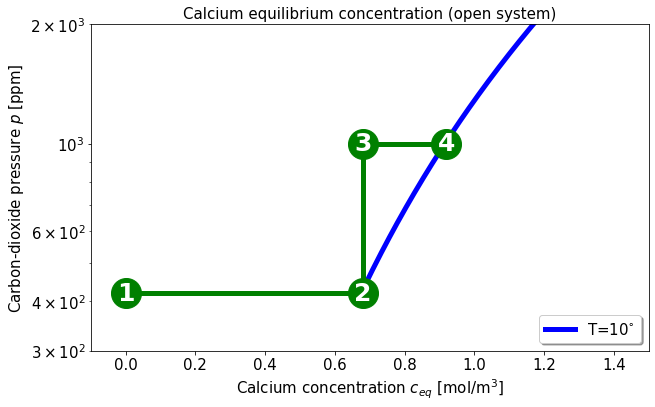

In [30]:
plt.figure(figsize=(10.0, 6.0))
plt.title('Calcium equilibrium concentration (open system)')
plt.xlim([-0.1,1.5])
plt.ylim([300,2000])
plt.xlabel('Calcium concentration $c_{eq}$ [mol/m$^3$]')
plt.ylabel('Carbon-dioxide pressure $p$ [ppm]')
plt.semilogy(ceq2,pco2,color='blue',linestyle='solid',linewidth=5,label='T=10$^{\circ}$')
plt.plot(c,p,marker='o',markersize=30,linewidth=5,color='green')
for i in range(len(n)):
    plt.text(c[i],p[i],str(n[i]),horizontalalignment='center',verticalalignment='center',
             color='white',weight='bold',fontsize=25)
plt.legend(loc='lower right',shadow=True)
plt.savefig('figures/CHEM_CEQ_PCO2.png')

In [31]:
n = np.array([1,2,3])
c = np.array([0.,0.775,0.92])
p = np.array([1000,1000,1000])

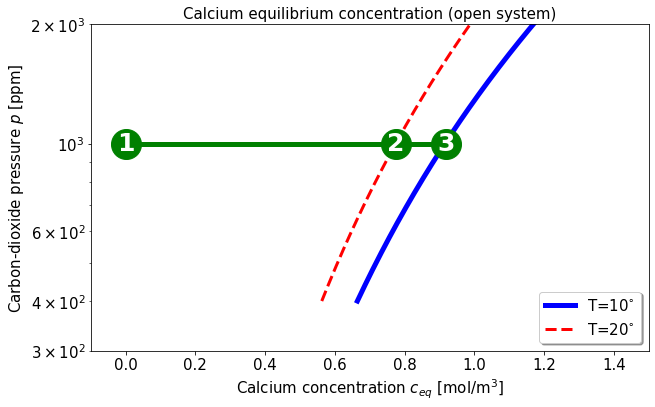

In [32]:
plt.figure(figsize=(10.0, 6.0))
plt.title('Calcium equilibrium concentration (open system)')
plt.xlim([-0.1,1.5])
plt.ylim([300,2000])
plt.xlabel('Calcium concentration $c_{eq}$ [mol/m$^3$]')
plt.ylabel('Carbon-dioxide pressure $p$ [ppm]')
plt.semilogy(ceq2,pco2,color='blue',linestyle='solid',linewidth=5,label='T=10$^{\circ}$')
plt.semilogy(ceq4,pco2,color='red',linestyle='dashed',linewidth=3,label='T=20$^{\circ}$')
plt.plot(c,p,marker='o',markersize=30,linewidth=5,color='green')
for i in range(len(n)):
    plt.text(c[i],p[i],str(n[i]),horizontalalignment='center',verticalalignment='center',
             color='white',weight='bold',fontsize=25)
plt.legend(loc='lower right',shadow=True)
plt.savefig('figures/CHEM_CEQ_PCO2.png')

----
## Literature

- Dreybrodt, Laukner, Svensson, Liu, Buhmann (1996). <br> **The kinetics of the reaction CO2 + H2O → H+ + HCO3− as one of the rate limiting steps for the dissolution of calcite in the system H2OCO2CaCO3**, Geochim. Cosmochim. Acta, 60(18):3375–3381
- Millero, Graham, Huang, Bustos-Serrano, Pierrot (2006). **Dissociation constants of carbonic acid in seawater as a function of salinity and temperature**,
Marine Chemistry 100(1-2):80-94.
- Schulz, Riebesell, Rost, Toms, Zeebe (2006): **Determination of the rate constants for the carbon dioxide to
bicarbonate inter-conversion in pH-buffered seawater systems**,
Marine Chemistry 100 (2006) 53–65.

----
[next>]()